In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get data

In [2]:
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
display(customer_df)
display(customer_df.shape)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


(9134, 24)

In [5]:
customer_df.info()  # we can see from that description that there are no NaNs in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [7]:
customer_df.columns = customer_df.columns.str.replace('employmentstatus', 'employment_status')

#### Change effective to date column to datetime format.

In [8]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

#### Creating a numerical dataframe

In [10]:
numerical_df=customer_df.select_dtypes(include=np.number)

In [11]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


## Define a function that differentiates between continuous and discrete variables.

#### STEP 1

In [12]:
# We found on "geekforgeeks" some defitions on the matter and how to visualize them. As follows: 
#A discrete variable is a type of variable that can only take on a finite or countable number of values. 
#These values are often integers or whole numbers. Discrete variables are typically represented using bar charts,
#histograms, or other types of charts that display data in a discrete form.
#On the other hand, a continuous variable is a type of variable that can take on any value within a 
#certain range or interval. Continuous variables are often measured using real numbers and can include decimal values. 
#Continuous variables are typically represented using boxplots or scatterplots.


#### STEP 2

In [13]:
# To help on our decision of defining a range of approprieate unique values to set the paramethers of our function, 
# we looked into the unique values of our smaller range of values.

In [14]:
print('The number of unique values in months_since_last_claim is:', len(numerical_df['months_since_last_claim'].unique()))
print('The number of unique values in months_since_policy_inception is:', len(numerical_df['months_since_policy_inception'].unique()))
print('The number of unique values in number_of_policies:', len(numerical_df['number_of_policies'].unique()))
print('The number of unique values in monthly_premium_auto:', len(numerical_df['monthly_premium_auto'].unique()))
print('The number of unique values in number_of_open_complaints:', len(numerical_df['number_of_open_complaints'].unique()))

The number of unique values in months_since_last_claim is: 36
The number of unique values in months_since_policy_inception is: 100
The number of unique values in number_of_policies: 9
The number of unique values in monthly_premium_auto: 202
The number of unique values in number_of_open_complaints: 6


#### STEP 3

##### We decided that 100 is the limit for discrete unique values. Specially because I believe all the discrete category can be better classified as categorical columns. 

In [15]:
def differentiate_variables(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals > 101:
            continuous_df[col] = df[col]
        else:
            discrete_df[col] = df[col]

    return continuous_df, discrete_df

continuous_df, discrete_df = differentiate_variables(numerical_df)

In [16]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [17]:
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


### Plot a correlation matrix

C:\Users\sabba\AppData\Local\Temp\ipykernel_8304\857371675.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle


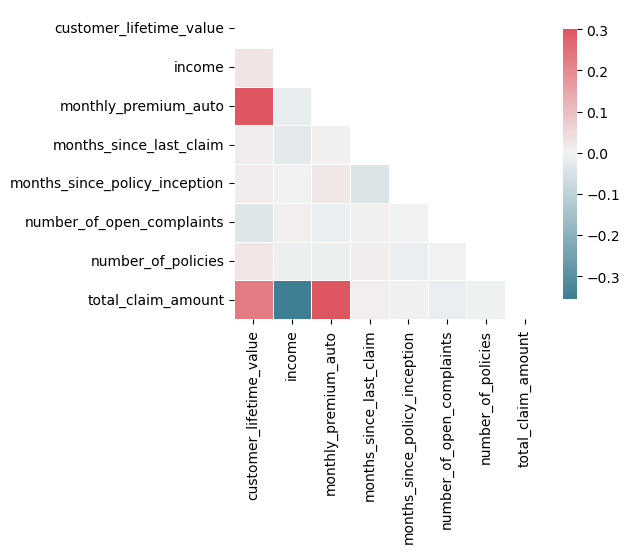

In [18]:
corr=numerical_df.corr()      # compute the correlation matrix


mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(5, 7))                 # set up the matplotlib figure

cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

#### Ordering it for better visualization

In [19]:
numerical_df_corr = numerical_df.corr()['total_claim_amount'][:-1] 
sorted_corr = numerical_df_corr.sort_values(ascending=False)
print("Correlation coefficients with total_claim_amount (in descending order):\n{}".format(sorted_corr))

Correlation coefficients with total_claim_amount (in descending order):
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64


In [20]:
# Conclusions on the correlations: we can see "monthly_premium_auto" shares the strongest positive relation with our target,
# followed by "Income" and "customer_lifetime_value". 

### Create a function to plot every discrete variable. Do the same with the continuous variables

In [21]:
# As previous researched showed us, barplots are the best to plot discrete variables:
def plot_discrete_variables(df):
    for col in numerical_df.columns:
        if numerical_df[col].nunique() < 10:
            sns.countplot(x=col, data=numerical_df)
            plt.show()

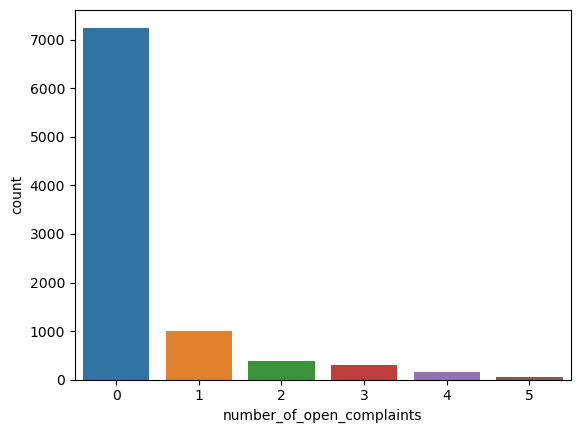

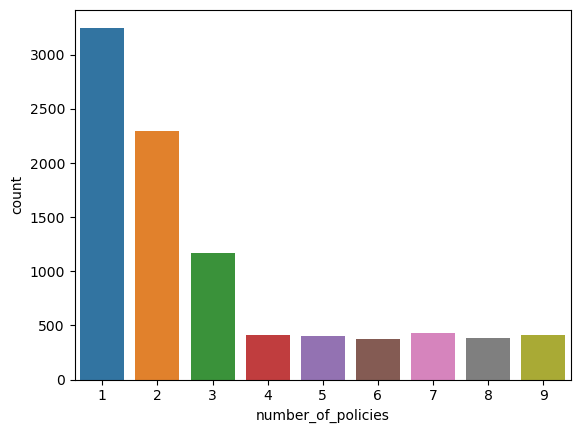

In [22]:
plot_discrete_variables(discrete_df)

In [23]:
# As previous researched showed us, scatterplots are the best to plot discrete variables:
def plot_continuous_variables(df):
    # Get number of columns in the dataframe
    num_cols = len(df.columns)

    # Create figure and subplots sp they look nice next to each other
    fig, axs = plt.subplots(1, num_cols, figsize=(num_cols*5, 5))

    # Loop through each column and plot scatterplot so we just use one code for all plots
    for i, col in enumerate(df.columns):
        if df[col].nunique() >= 10:
            sns.scatterplot(x=col, y='total_claim_amount', data=df, ax=axs[i])

    plt.show()

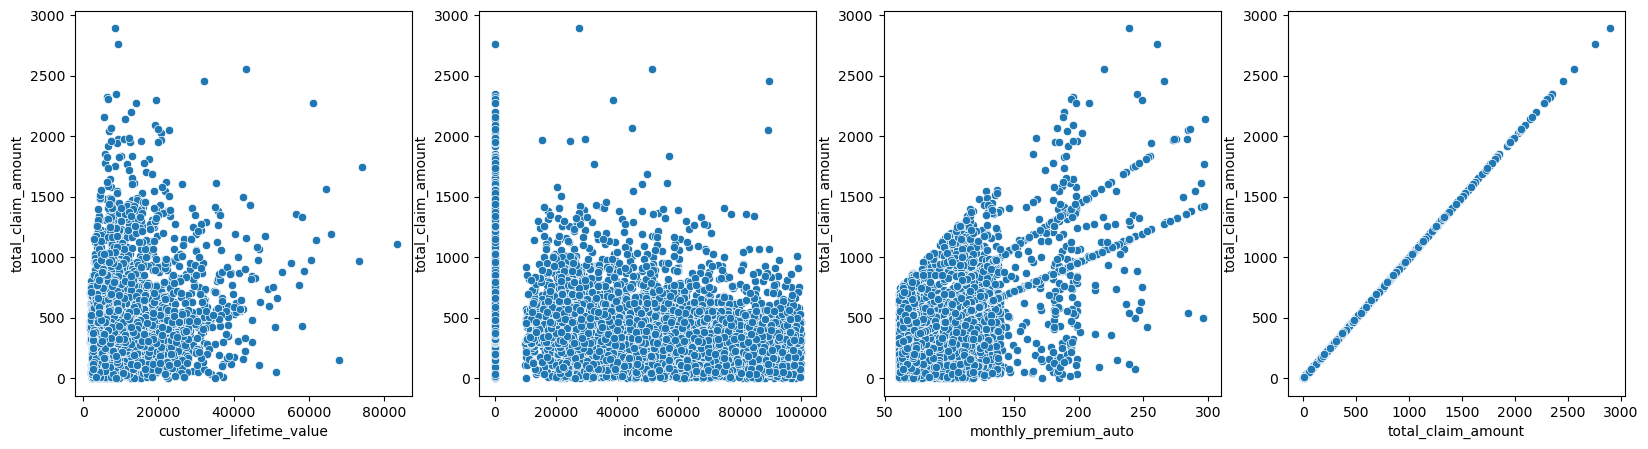

In [24]:
plot_continuous_variables(continuous_df)

In [25]:
# showing as boxplot as well

In [26]:
def plot_continuous_variables(df):
    num_cols = len(df.columns)
    fig, axs = plt.subplots(1, num_cols, figsize=(num_cols*5, 5))
    for i, col in enumerate(df.columns):
        if df[col].nunique() >= 10:
            sns.boxplot(x=col, data=df, ax=axs[i])

    plt.show()

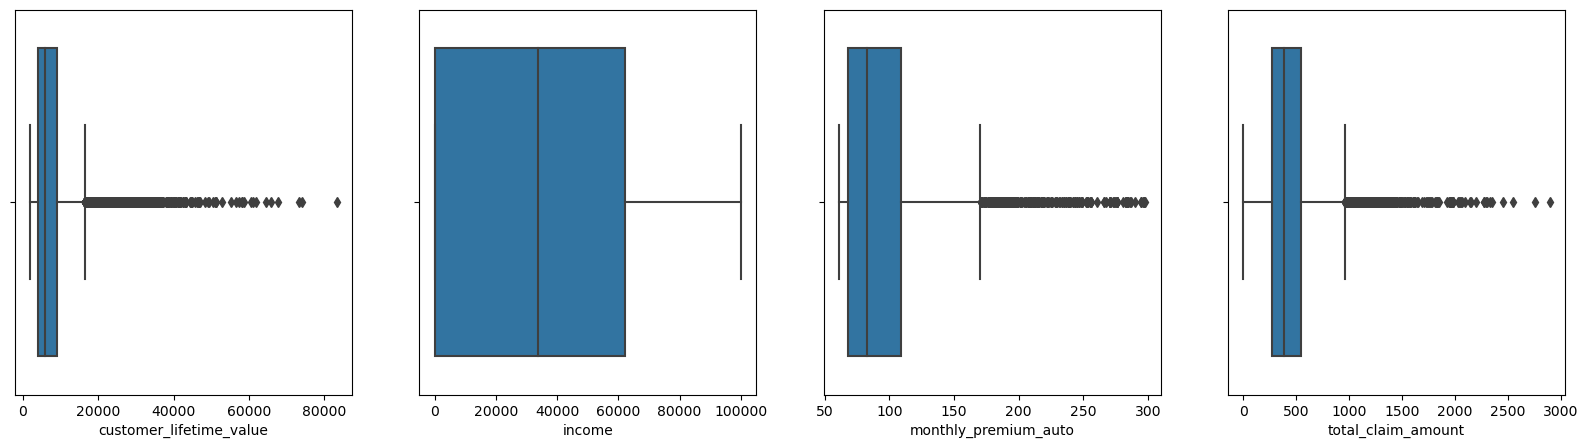

In [27]:
plot_continuous_variables(continuous_df)

In [28]:
# Just as a bonus, I read on the additional resources material on the student portal that pairplots are usefull too for
# visualization so I am having a look into it.
def plot_continuous_variables(df):
        
    sns.pairplot(continuous_df)

    
    plt.show()

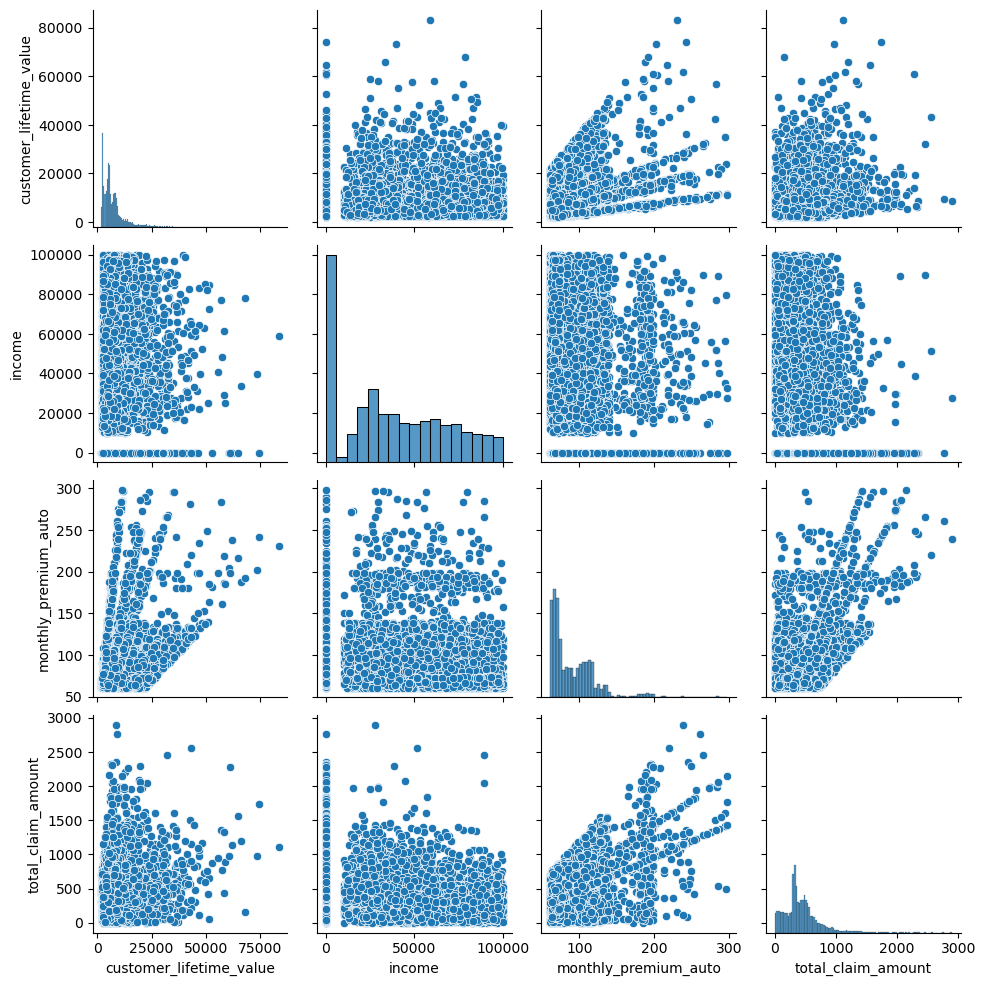

In [29]:
plot_continuous_variables(continuous_df)

#### Conclusions on plots/ outliers:

In [30]:
# We found that on the column "income" there are a considerable amount of values '0'. They are not nulls, because very 
# unlikely someone would afford an insurance having no income. Therefore it is just an unknow value.
# We are replacing the '0' values with the mean.
# With the boxplots, having outliers in mind, we saw "that customer_lifetime_value", "monthly_premium_auto" 
# are a distribution skewed to the right. Therefore, dropping those outliers with the following codes and paramethers.
# Not dropping the outliers on the targe because it would affect the predictions.

In [31]:
numerical_dropped_outliers = numerical_df[numerical_df['customer_lifetime_value'] <= 70000].copy()
numerical_dropped_outliers = numerical_df[numerical_df['monthly_premium_auto'] <= 270].copy()

#### Dealing with ouliers in the "income" column

<AxesSubplot:>

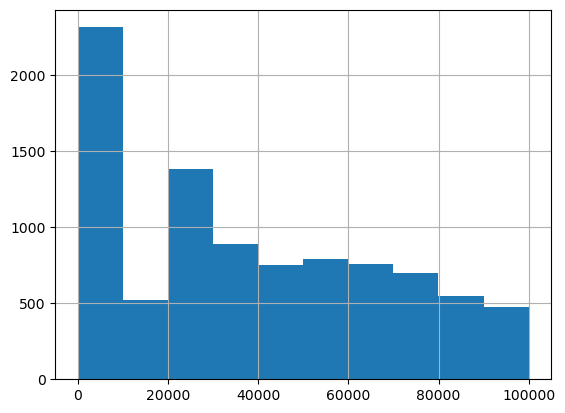

In [32]:
# checking the distribution before the replacement operation.
numerical_df['income'].hist()

In [33]:
# The mean income creates a better distribution then median
mean_income = numerical_df[numerical_df['income'] != 0]['income'].mean()

In [34]:
mean_income

50456.58046061317

In [35]:
# replace zeros in the 'income' column with the mean value
numerical_df.loc[numerical_df['income'] == 0, 'income'] = mean_income

<AxesSubplot:>

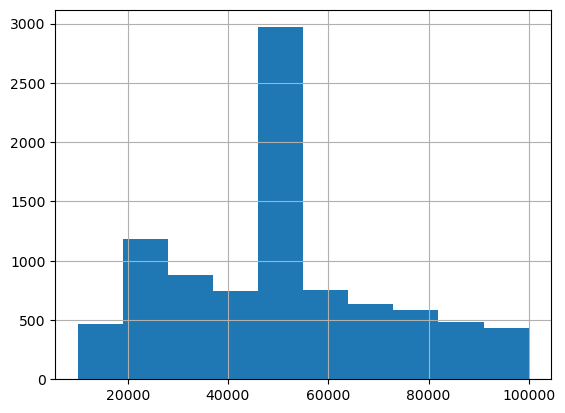

In [36]:
# Checking the distribution after the replacemnt, for comparison.
numerical_df['income'].hist()

#### Saving it

In [37]:
numerical_df.to_csv('numerical.csv', index=False)

#  Linear Model - just practing the code flow and to compare whether the scores where too affected by dropping the outliers or not. My conclusion is that it did not change a thing.

In [38]:
y = numerical_df['total_claim_amount']
X = numerical_df.drop(['total_claim_amount'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [40]:
from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler

In [41]:
transformer = MinMaxScaler().fit(X_train) 

X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [42]:
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [43]:
classification = linear_model.LinearRegression()
classification.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
predictions = classification.predict(X_test_scaled)


In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
print('R2 Score:', r2_score(y_test, predictions)) 
print('RMSE Score:', round(np.sqrt(mean_squared_error(y_test, predictions)), 4))  


R2 Score: 0.4533255275142707
RMSE Score: 222.3155
